In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('ggplot')
from textblob import TextBlob

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
from nltk.stem import PorterStemmer

In [6]:
from nltk.corpus import stopwords

In [7]:
stop_words = set(stopwords.words('english'))

In [8]:
from wordcloud import WordCloud

In [9]:
df=pd.read_csv('vaccination_tweets.csv')

In [10]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2446 non-null   float64
 1   user_name         2446 non-null   object 
 2   user_location     1938 non-null   object 
 3   user_description  2326 non-null   object 
 4   user_created      2446 non-null   object 
 5   user_followers    2446 non-null   int64  
 6   user_friends      2446 non-null   int64  
 7   user_favourites   2446 non-null   int64  
 8   user_verified     2446 non-null   bool   
 9   date              2446 non-null   object 
 10  text              2446 non-null   object 
 11  hashtags          1831 non-null   object 
 12  source            2445 non-null   object 
 13  retweets          2446 non-null   int64  
 14  favorites         2446 non-null   int64  
 15  is_retweet        2446 non-null   bool   
dtypes: bool(2), float64(1), int64(5), object(8

In [12]:
#count for null entries
df.isnull().sum()

id                    0
user_name             0
user_location       508
user_description    120
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            615
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [13]:
#show the columns of the dataset
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [14]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()
#axis=1 indicates the columns

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [15]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [16]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2446 non-null   object
dtypes: object(1)
memory usage: 19.2+ KB


In [17]:
#convert data into usable formats
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)#removing url using regex function
    text = re.sub(r'\@w+|\#','',text)#removing the # using the regex funtction
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [18]:
import nltk
nltk.download
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
text_df.text = text_df['text'].apply(data_processing)

In [20]:
text_df = text_df.drop_duplicates('text')#removing duplicate data

In [21]:
#perform stemming iam going to use porter or lancast or even use limitation instead   of stemming
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [22]:
text_df['text']=text_df['text'].apply(lambda x: stemming(x))

In [23]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [24]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [25]:
text_df.info()
#column reduced to 2398
#now data is preprocessed and ready to use

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 0 to 2445
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2398 non-null   object
dtypes: object(1)
memory usage: 37.5+ KB


In [26]:
#define a function to calculate text polarity using textblob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [27]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [28]:
text_df.head(20)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000000
1,world wrong side history year hopefully bigges...,-0.500000
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000000
3,facts immutable senator even youre ethically s...,0.100000
4,explain need vaccine borisjohnson matthancock ...,0.000000
5,anyone useful adviceguidance whether covid vac...,0.400000
6,bit sad claim fame success vaccination patriot...,-0.100000
7,many bright days 2020 best 1 bidenharris winni...,0.675000
8,covid vaccine getting covidvaccine covid19 pfi...,0.000000
9,covidvaccine states start getting covid19vacci...,0.000000


In [29]:
#now lets add sentiment column 
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [30]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [31]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

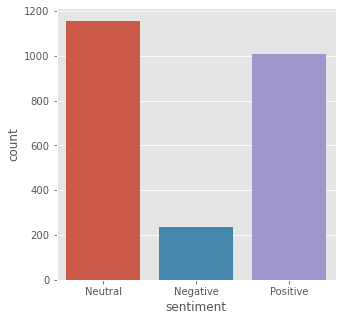

In [32]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

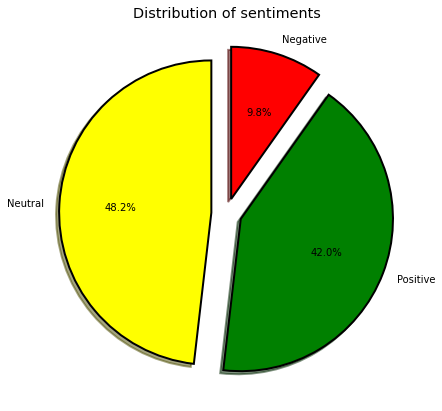

In [33]:
#visualizing data using pie chart
fig = plt.figure(figsize=(7,7))
colors = ("yellow", "green", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
#specify the distance for how much wadges should be exploted
explode = (0.1,0.1,0.1)
#lets plot the pie chart
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [34]:
#top five tweets for each sentiment starting with positive
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
864,oh best explanation vaccine immune response pf...,1.0,Positive
347,md dr susannah thompson pulling stops leading ...,1.0,Positive
2072,dr marc siegel covid vaccinations increase rap...,1.0,Positive
1673,one best christmas gifts ive ever received par...,1.0,Positive
11,cnnbrk covid19 covidvaccine vaccine corona pfi...,1.0,Positive


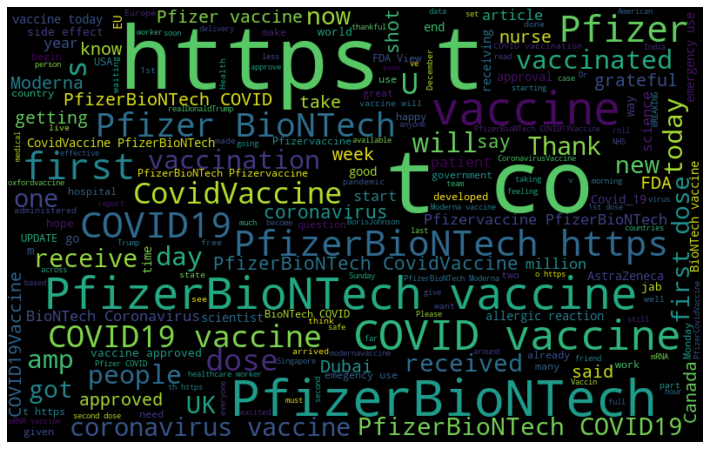

In [35]:
#exploretory data analysis
#frequent qords visualization for size
all_words=" ".join([sentence for sentence in df['text']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#now plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2194,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
1323,chef responsible customers death due food pois...,-0.008333,Negative
575,u think bill gates evil becoime rich nice pers...,-0.008333,Negative
314,mandated anthrax vaccine killed 35k us soldier...,-0.011111,Negative
913,excited feeling dizzy pfizerbiontech vaccine m...,-0.012500,Negative


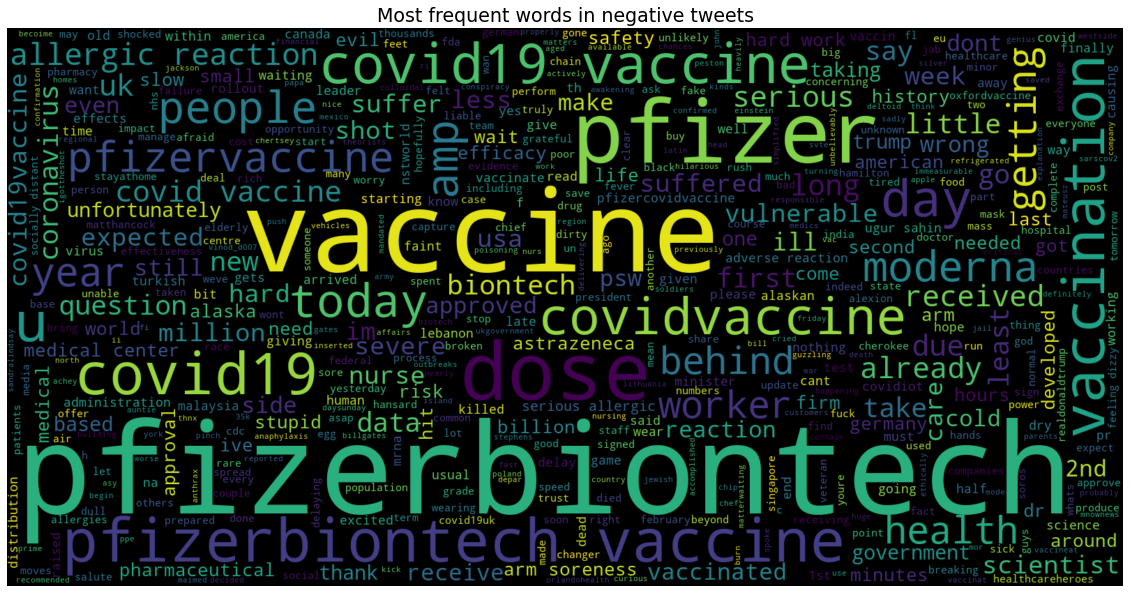

In [37]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [38]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1824,vaccinated covidvaccine pfizerbiontech,0.0,Neutral
1647,nstnation nondisclosure agreement contract thu...,0.0,Neutral
1644,vaccinated pfizerbiontech covid19vaccine thank...,0.0,Neutral
1643,eu launches pfizerbiontech vaccine rollout acr...,0.0,Neutral


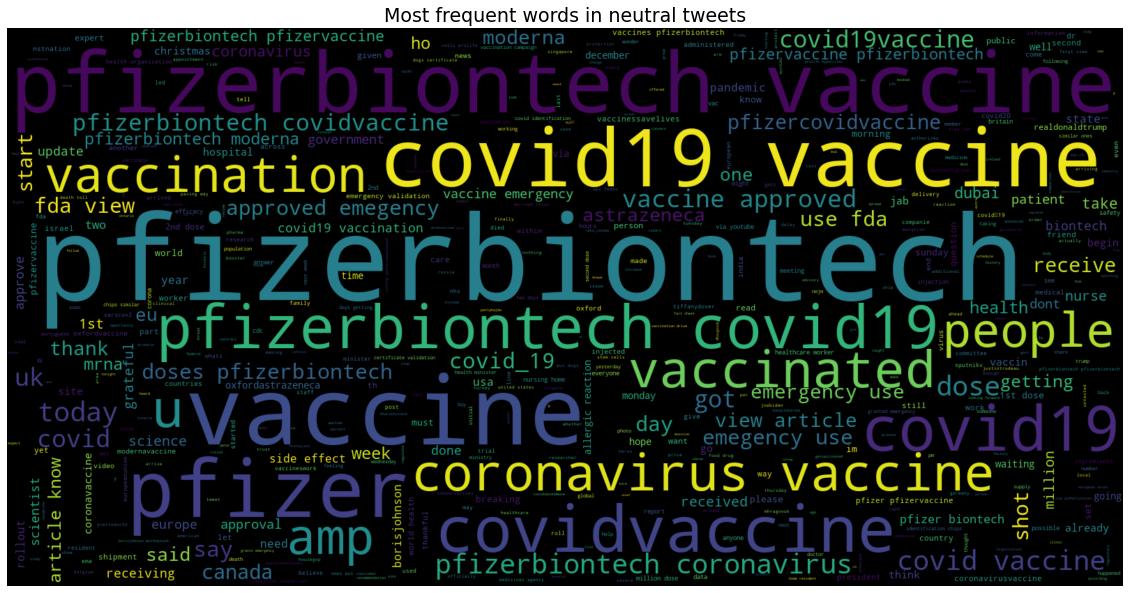

In [39]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [40]:
#next vectorize the data using count vectorizer
#bigram gives you two words
#ngram language model means a sequence of n words so bigram model will give two words
#perform countvectorization to perfomr a bigram model
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])#we can also use tfidf vector

In [41]:
#now lets get the number of featuresand print the first 20 features
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))#we can get a first 20 features of bigram lamguage model

Number of features: 22542

First 20 features:
 ['000', '000 initial', '000 people', '02012021', '02012021 grateful', '045', '045 ml', '05', '05 became', '09', '09 sodium', '10', '10 11', '10 days', '10 million', '10 min', '10 months', '10 red', '10 years', '100']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1918, 22542)
Size of y_train: (1918,)
Size of x_test: (480, 22542)
Size of y_test: (480,)


In [45]:
#now if remove ewarning use this commands
import warnings
warnings.filterwarnings('ignore')

In [46]:
#first lets train a data using logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 76.46%


In [47]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  6  35  15]
 [  0 210  11]
 [  0  52 151]]


              precision    recall  f1-score   support

    Negative       1.00      0.11      0.19        56
     Neutral       0.71      0.95      0.81       221
    Positive       0.85      0.74      0.79       203

    accuracy                           0.76       480
   macro avg       0.85      0.60      0.60       480
weighted avg       0.80      0.76      0.73       480



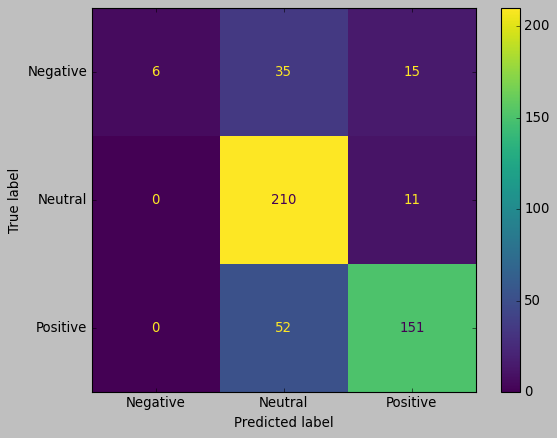

In [48]:
#visualize the confusion matrix
style.use('classic')
cm=confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10}


In [55]:
y_pred = grid.predict(x_test)

# CHECKING ACCURACY OF  MODEL

In [56]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 76.67%


# SVM MODEL

In [57]:
from sklearn.svm import LinearSVC

In [58]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [59]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 78.12%


In [60]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 11  33  12]
 [  1 210  10]
 [  0  49 154]]


              precision    recall  f1-score   support

    Negative       0.92      0.20      0.32        56
     Neutral       0.72      0.95      0.82       221
    Positive       0.88      0.76      0.81       203

    accuracy                           0.78       480
   macro avg       0.84      0.64      0.65       480
weighted avg       0.81      0.78      0.76       480



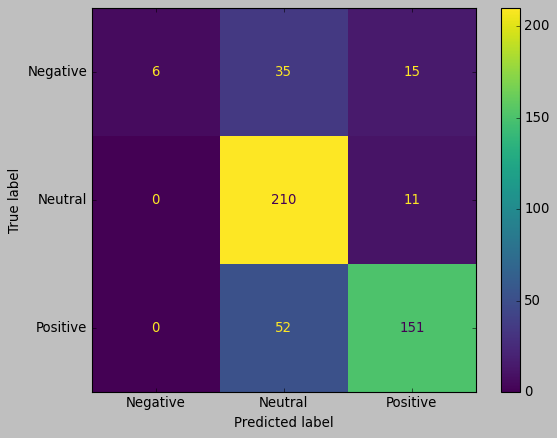

In [61]:
style.use('classic')
cm=confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [62]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [63]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [64]:
y_pred = grid.predict(x_test)

# ACCURACY OF SVM MODEL

In [65]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 78.12%


In [66]:
#get the indepedent featuers
text_df.shape

(2398, 3)

# APPLYING DEEP LEARNING MODEL

In [49]:
import tensorflow as tf
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [50]:
z = text_df.drop(['polarity'], axis=1)
z.head()

,text,sentiment
0,folks said daikon paste could treat cytokine s...,Neutral
1,world wrong side history year hopefully bigges...,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,Neutral
3,facts immutable senator even youre ethically s...,Positive
4,explain need vaccine borisjohnson matthancock ...,Neutral


In [51]:
z.sentiment.value_counts()

Neutral     1155
Positive    1008
Negative     235
Name: sentiment, dtype: int64

In [52]:
txt=z['text'][0]
print(txt)
print("<===============>")
print(word_tokenize(text))

folks said daikon paste could treat cytokine storm pfizerbiontech
<===============>
['folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', 'pfizerbiontech', 'vaccinated', 'covidvaccine', 'pfizerbiontech', 'nstnation', 'nondisclosure', 'agreement', 'contract', 'thus', 'breach', 'confidentiality', 'amounts', 'breach', 'vaccinated', 'pfizerbiontech', 'covid19vaccine', 'thank', 'saudimoh', 'eu', 'launches', 'pfizerbiontech', 'vaccine', 'rollout', 'across', 'bloc', 'kuwait', 'approved', 'pfizerbiontech', 'vaccine', 'december', 'site', 'set', 'people', 'wishing', 'vaccin', 'oman', 'sunday', 'launched', 'coronavirus', 'vaccination', 'programme', 'excellency', 'dr', 'ahmed', 'al', 'saidi', 'minister', 'sunday', 'morning', 'cyprus', 'officially', 'began', 'roll', 'pfizerbiontech', 'covid', 'vaccine', 'targeting', 'pensioners', 'lebanon', 'country', 'six', 'million', 'people', 'signed', '18', 'million', 'agreement', 'pfizerbiontech', 'one', 'shot', 'time', 'pfizerbiontech', 

In [53]:
corpus=[]
for txt in z['text']:
    words=[word.lower() for word in word_tokenize(txt)]
    corpus.append(words)

In [54]:
num_words=len(corpus)
print(num_words)

2398


In [55]:
z.shape

(2398, 2)

In [56]:
train_size=int(z.shape[0] * 0.75)
X_train=z.text[:train_size]
y_train=z.sentiment[:train_size]
X_test=z.text[train_size:]
y_test=z.sentiment[train_size:]

In [57]:
tokenizer=Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(X_train, maxlen=128, truncating='post', padding='post')

In [58]:
X_train[0], len(X_train[0])

(array([ 525,   49, 1871, 1872,  200, 1125, 1873, 1126,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]),
 128)

In [59]:
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=128, truncating='post', padding='post')

In [60]:
X_test[0], len(X_test[0])

(array([1607, 1487, 1285,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]),
 128)

In [61]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1798, 128) (1798,)
(600, 128) (600,)


In [62]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [63]:
model=Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128, trainable=True))
model.add(LSTM(100, dropout=0.1, return_sequences=True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          239800    
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 400,701
Trainable params: 400,701
Non-trainable params: 0
_________________________________________________________________


In [65]:
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
29/29 [==============================] - 25s 618ms/step - loss: -1.8765 - accuracy: 0.4805 - val_loss: -3.9407 - val_accuracy: 0.4767
Epoch 2/50
29/29 [==============================] - 15s 530ms/step - loss: -4.4371 - accuracy: 0.4833 - val_loss: -5.1212 - val_accuracy: 0.4767
Epoch 3/50
29/29 [==============================] - 15s 523ms/step - loss: -5.5052 - accuracy: 0.4833 - val_loss: -6.1311 - val_accuracy: 0.4767
Epoch 4/50
29/29 [==============================] - 15s 528ms/step - loss: -6.4681 - accuracy: 0.4833 - val_loss: -7.1013 - val_accuracy: 0.4767
Epoch 5/50
29/29 [==============================] - 17s 606ms/step - loss: -7.4314 - accuracy: 0.4833 - val_loss: -8.0726 - val_accuracy: 0.4767
Epoch 6/50
29/29 [==============================] - 16s 552ms/step - loss: -8.3515 - accuracy: 0.4833 - val_loss: -9.0065 - val_accuracy: 0.4767
Epoch 7/50
29/29 [==============================] - 16s 551ms/step - loss: -9.2858 - accuracy: 0.4833 - val_loss: -9.9674 - val_ac